<html> <img style="float:center; margin: 0px 0px 0px 0px;" src="https://docs.google.com/uc? export=download&id=1JDfKEyqZsOrv8tZrgeIDJFQ_c_W0LF-K" width="370" align="left"/> </html> 


<center> <H1> <b>Data Analysis with Python </b><figure> </H1> </center>
<center> <H6>  </H6> </center>



# What is Groupby in Pandas?

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,-1.370714,0.507183
1,a,two,1.011339,0.387536
2,b,three,0.492987,1.028860
3,b,one,0.777039,-1.191422
4,a,two,0.118195,-1.088494
5,b,three,0.996562,-0.503043


In [ ]:
group=df["data1"].groupby(df["key1"])

In [ ]:
group

In [ ]:
group.mean()

key1
a   -0.080393
b    0.755529
Name: data1, dtype: float64

## Grouping with Functions

In [ ]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

,a,b,c,d
apple,0.325380,-2.548511,-0.444229,0.877716
cherry,-1.716242,0.189331,1.034052,-0.357073
banana,-0.624583,0.632684,-0.100368,0.310402
kiwi,-1.443977,0.461064,-0.610629,2.044166


In [ ]:
fruit.groupby(len).sum()

,a,b,c,d
4,-1.443977,0.461064,-0.610629,2.044166
5,0.325380,-2.548511,-0.444229,0.877716
6,-2.340825,0.822015,0.933684,-0.046670


## Grouping by Index Levels

In [ ]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [ ]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0      -0.067537 -2.355876  0.397236 -2.195674  0.371300
1      -1.152336  2.392917 -0.396312 -0.303970 -0.532156
2      -0.710807  0.349965  0.878135  1.051875 -0.821061
3       1.954204  1.591142 -0.106925  0.118916 -0.396498

In [ ]:
data.groupby(level="letter",axis=1).sum()

letter,A,B
0,-2.026177,-1.824374
1,0.844270,-0.836126
2,0.517293,0.230814
3,3.438421,-0.277581


## Application with Real Data Set 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Formation Data Science (Esprims)/CHAPITRE 4 : Analyses de données avec Pandas/DataSets/vgsalesGlobale.csv'
game=pd.read_csv(path)

In [ ]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
game.Global_Sales.mean()

0.5374406555006628

In [ ]:
group=game.groupby("Genre")

In [ ]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [ ]:
group["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [ ]:
game[game.Genre=="Action"].Global_Sales.mean()

0.5281001206272617

In [ ]:
group.mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


In [ ]:
%matplotlib inline

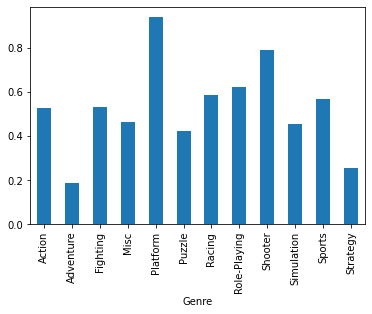

In [ ]:
group["Global_Sales"].mean().plot(kind="bar")

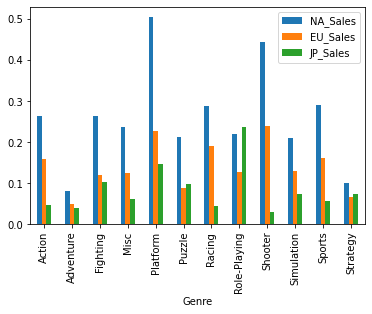

In [ ]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].mean().plot(kind="bar")